In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


2025-04-10 13:36:32.900979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744292193.120439      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744292193.184973      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
IMG_SIZE = 96
BATCH_SIZE = 32

def preprocess(data):
    image = tf.image.resize(data['image'], (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(data['label'], tf.float32)
    return image, label


train_data, val_data, test_data = tfds.load(
    'patch_camelyon',
    split=['train[:80%]', 'train[80%:]', 'test'],
    as_supervised=False
)


train_data = train_data.map(preprocess).shuffle(1024).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_data   = val_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data  = test_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...:   0%|          | 0/32768 [00:00<?, ? examples/s]

I0000 00:00:1744292470.590808      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.SY325O_2.0.0/patch_camelyon-test.tfrecord*...:  …

Generating train examples...:   0%|          | 0/262144 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.SY325O_2.0.0/patch_camelyon-train.tfrecord*...: …

Generating validation examples...:   0%|          | 0/32768 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.SY325O_2.0.0/patch_camelyon-validation.tfrecord*…

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


In [ ]:
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  
    ])
    return model

cnn_model = build_cnn_model()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [6]:
history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10


I0000 00:00:1744293245.882332     109 service.cc:148] XLA service 0x7c71f0026d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744293245.883479     109 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744293246.291593     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


  17/6554 ━━━━━━━━━━━━━━━━━━━━ 1:07 10ms/step - accuracy: 0.5015 - loss: 0.7450

I0000 00:00:1744293249.102049     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6554/6554 ━━━━━━━━━━━━━━━━━━━━ 78s 11ms/step - accuracy: 0.7830 - loss: 0.4636 - val_accuracy: 0.8667 - val_loss: 0.3204
Epoch 2/10
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - accuracy: 0.8760 - loss: 0.3022 - val_accuracy: 0.8983 - val_loss: 0.2500
Epoch 3/10
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - accuracy: 0.9011 - loss: 0.2492 - val_accuracy: 0.9109 - val_loss: 0.2275
Epoch 4/10
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 69s 10ms/step - accuracy: 0.9171 - loss: 0.2136 - val_accuracy: 0.9148 - val_loss: 0.2220
Epoch 5/10
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - accuracy: 0.9282 - loss: 0.1865 - val_accuracy: 0.9215 - val_loss: 0.2100
Epoch 6/10
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - accuracy: 0.9386 - loss: 0.1610 - val_accuracy: 0.9215 - val_loss: 0.2223
Epoch 7/10
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 69s 10ms/step - accuracy: 0.9461 - loss: 0.1414 - val_accuracy: 0.9206 - val_loss: 0.2458
Epoch 8/10
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - accuracy: 0.9551 - loss: 0.12

In [7]:
test_loss, test_acc = cnn_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")


1024/1024 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7748 - loss: 1.3634
Test Accuracy: 0.7744


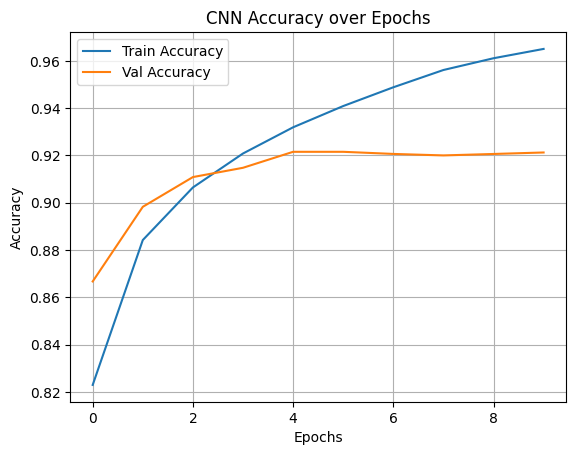

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

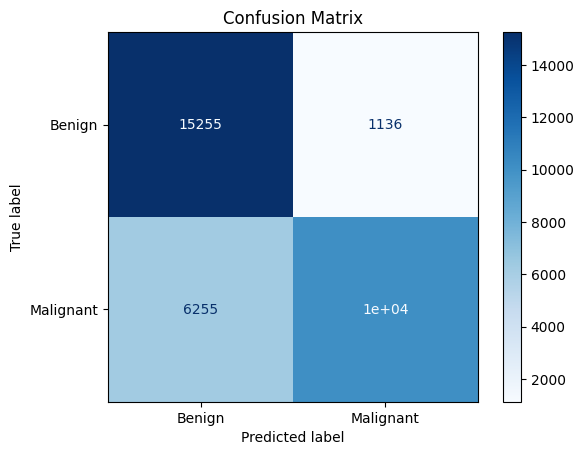

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


y_true = []
y_pred = []

for images, labels in test_data:
    preds = cnn_model.predict(images)
    y_pred.extend(np.round(preds).flatten())  
    y_true.extend(labels.numpy().flatten())


print("Classification Report:\n")
print(classification_report(y_true, y_pred))


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

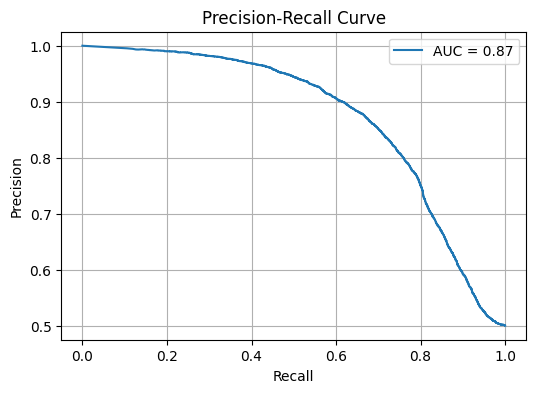

In [11]:
from sklearn.metrics import precision_recall_curve, auc

y_pred_prob = []

for images, _ in test_data:
    preds = cnn_model.predict(images)
    y_pred_prob.extend(preds.flatten())

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
cnn_model.save("cnn_model.keras")
